# ClusterAl 2020


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521
# EDA del Caso comercial de venta de refrigerante

#### Docente: Martin Palazzo
#### Ayudante: Agustin Velazquez



##### Alumnos: Contreras, Manuel
#####                   De Leo, Andres
#####                   Tondini, Eduardo Matias

# 1-Importacion de Librerias

### Librerias basicas

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Librerias de Scikit Learn para distintos modelos de clasificacion

In [43]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Librerias de Feature Selection y PCA

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold
# Importamos librerias de PCA
from sklearn.decomposition import PCA

# 2- Importacion del dataset y computacion de sus caracteristicas

In [45]:
data_training= pd.read_csv(r"C:\Users\Asus\Desktop\cs de datos palazzo\ECI_2020.csv", parse_dates=True)

In [46]:
data_training.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [47]:
data_training.shape

(16947, 52)

# 2- Visualizaciones

Para mayor entendimiento de los datos.

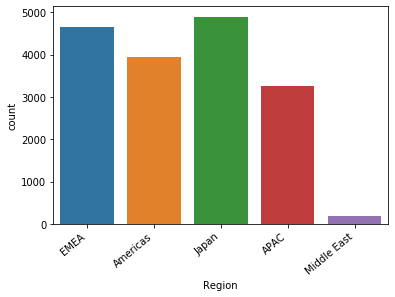

In [48]:
ax = sns.countplot(x="Region", data=data_training)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

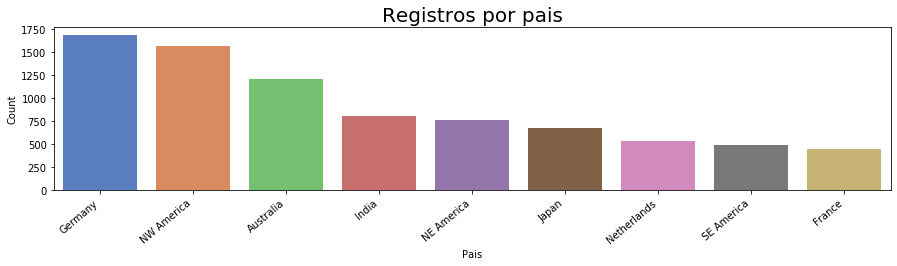

In [49]:
top_countries = data_training['Territory'].value_counts().index[1:10]

#Se empieza a contar desde el 1 porque contando desde el 0, el pais con mayor cantidad de registros es "None"
plt.figure(figsize=(15,3))
g = sns.countplot(data_training['Territory'], palette = "muted",order=top_countries)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Registros por pais',size = 20)
plt.xlabel("Pais")
plt.ylabel("Count")
plt.show()

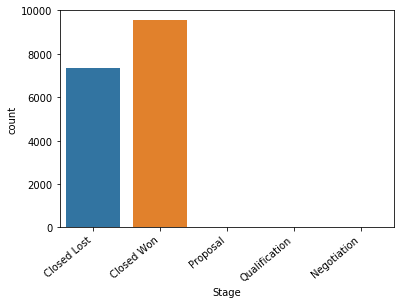

In [50]:
ax = sns.countplot(x="Stage", data=data_training)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

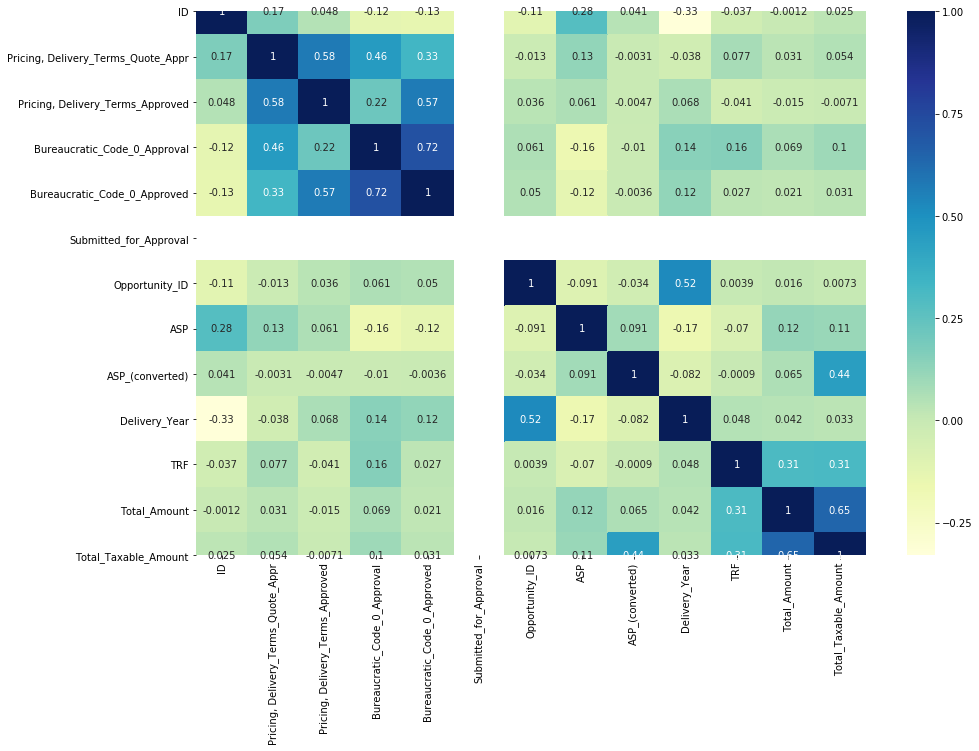

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(data_training.corr('pearson'), annot= True, cmap="YlGnBu")
plt.show()

# 3- Data Cleaning

Se observa que el dataset tiene una gran cantidad de features, muchas se asume que no aportan informacion de interes al modelo por lo que se decide eliminarlas para enfocar los esfuerzos en aquellas que si importan.

In [52]:
data_training = data_training.drop(["Submitted_for_Approval","Account_Name","Opportunity_Name","Last_Activity","Quote_Expiry_Date",
"Brand","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Created_Date","Last_Modified_Date","Last_Modified_By",
 "Month","Delivery_Quarter","Actual_Delivery_Date","Prod_Category_A","Opportunity_Type","Account_Created_Date","Source "
,"Territory","Product_Type","Price","Currency","Quote_Type","ASP_(converted)_Currency","Product_Name","Delivery_Year","Size",
"Total_Taxable_Amount_Currency","ASP_Currency","ID"], axis=1)

In [53]:
data_training.head()

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Opportunity_Owner,Account_Type,Delivery_Terms,...,Product_Family,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount,Stage
0,EMEA,1,1,1,1,Bureaucratic_Code_4,Netherlands,Person_Name_18,Account_Type_2,Delivery_Terms_2,...,Product_Family_77,0.52,0.58817,5/1/2016,6/30/2016,10,EUR,5272800.0,5272800.0,Closed Lost
1,EMEA,0,0,0,0,Bureaucratic_Code_4,Netherlands,Person_Name_20,Account_Type_2,Delivery_Terms_2,...,Product_Family_77,0.53,0.59948,1/18/2016,1/20/2016,0,EUR,48230.0,48230.0,Closed Won
2,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Person_Name_8,Account_Type_5,Delivery_Terms_4,...,Product_Family_81,0.48,0.48000,1/25/2016,1/25/2016,0,USD,83865.6,83865.6,Closed Won
3,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Person_Name_8,Account_Type_5,Delivery_Terms_1,...,Product_Family_209,0.53,0.53000,2/1/2018,3/31/2018,14,USD,7421881.5,7421881.5,Closed Lost
4,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Person_Name_8,Account_Type_5,Delivery_Terms_1,...,Product_Family_209,0.53,0.53000,2/1/2018,2/28/2018,25,USD,13357192.5,13357192.5,Closed Lost


Como se expreso anteriormente el objetivo del modelo es clasificar las oportunidades de negocio y diferenciar las que tienen mayores chances de ser exitosas respecto de las que no, para priorizar el trabajo de los comerciales en dichas ofertas. Dado que las que aun no tienen un outcome no le suman informacion al proyecto e imposibilitan la posibilidad de crear variables dummy binarias, se las elimina.

In [54]:
data_training = data_training[data_training['Stage'] != 'Proposal']
data_training = data_training[data_training['Stage'] != 'Negotiation']
data_training = data_training[data_training['Stage'] != 'Qualification']

In [55]:
data_training.shape

(16883, 21)

Se unifican las cantidades monetarios a dolares

In [56]:
data_training["Total_Amount_USD"] = (data_training["Total_Amount"]/data_training["ASP"])*data_training["ASP_(converted)"]

In [57]:
data_training = data_training.drop(["Total_Amount","ASP","ASP_(converted)"], axis=1)

In [58]:
data_training.isnull().any()

Region                                False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Bureaucratic_Code                     False
Billing_Country                       False
Opportunity_Owner                     False
Account_Type                          False
Delivery_Terms                        False
Product_Category_B                    False
Product_Family                        False
Planned_Delivery_Start_Date           False
Planned_Delivery_End_Date             False
TRF                                   False
Total_Amount_Currency                 False
Total_Taxable_Amount                  False
Stage                                 False
Total_Amount_USD                       True
dtype: bool

In [59]:
categorical_features = data_training.select_dtypes(include=['object']).columns
categorical_features

Index(['Region', 'Bureaucratic_Code', 'Billing_Country', 'Opportunity_Owner',
       'Account_Type', 'Delivery_Terms', 'Product_Category_B',
       'Product_Family', 'Planned_Delivery_Start_Date',
       'Planned_Delivery_End_Date', 'Total_Amount_Currency', 'Stage'],
      dtype='object')

In [60]:
bureaucratric_code_dummy= pd.get_dummies(data_training.Bureaucratic_Code)
account_type_dummy=pd.get_dummies(data_training.Account_Type)
delivery_terms_dummy=pd.get_dummies(data_training.Delivery_Terms)
region_dummy=pd.get_dummies(data_training.Region)
billing_country_dummy=pd.get_dummies(data_training.Billing_Country)
opportunity_owner_dummy=pd.get_dummies(data_training.Opportunity_Owner)
product_family_dummy=pd.get_dummies(data_training.Product_Family)
stage_dummy=pd.get_dummies(data_training.Stage)

Las variables Planned_Delivery_Start_Date y Planned_Delivery_End_Date son utilizadas para calcular la cantidad de dias que duro la operacion.

In [61]:
data_training['Planned_Delivery_Start_Date'] = pd.to_datetime(data_training['Planned_Delivery_Start_Date'])
data_training['Planned_Delivery_End_Date'] = pd.to_datetime(data_training['Planned_Delivery_End_Date'])

In [62]:
data_training['Lenght_of_Operation'] = data_training['Planned_Delivery_End_Date'] - data_training['Planned_Delivery_Start_Date']


In [63]:
data_training['Total_Days'] = data_training['Lenght_of_Operation'].dt.days.astype('float')

In [64]:
data_training = pd.concat([data_training,bureaucratric_code_dummy,account_type_dummy,delivery_terms_dummy,region_dummy,billing_country_dummy,opportunity_owner_dummy,product_family_dummy,stage_dummy], axis=1)

In [65]:
data_training= data_training.drop(["Stage","Closed Won"], axis=1)
data_training= data_training.drop(["Region","Bureaucratic_Code","Billing_Country","Opportunity_Owner","Account_Type","Delivery_Terms","Product_Family","Product_Category_B","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Total_Amount_Currency",'Lenght_of_Operation'], axis=1)

In [66]:
data_training.head()

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Total_Taxable_Amount,Total_Amount_USD,Total_Days,Bureaucratic_Code_0,Bureaucratic_Code_1,...,Product_Family_91,Product_Family_92,Product_Family_93,Product_Family_94,Product_Family_95,Product_Family_96,Product_Family_97,Product_Family_98,Product_Family_99,Closed Lost
0,1,1,1,1,10,5272800.0,5964043.80,60.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,48230.0,54552.68,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,83865.6,83865.60,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,14,7421881.5,7421881.50,58.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,25,13357192.5,13357192.50,27.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
data_training=data_training.dropna()

In [68]:
data_training.shape

(13255, 394)

In [69]:
data_training.max()

Pricing, Delivery_Terms_Quote_Appr      1.0
Pricing, Delivery_Terms_Approved        1.0
Bureaucratic_Code_0_Approval            1.0
Bureaucratic_Code_0_Approved            1.0
TRF                                   500.0
                                      ...  
Product_Family_96                       1.0
Product_Family_97                       1.0
Product_Family_98                       1.0
Product_Family_99                       1.0
Closed Lost                             1.0
Length: 394, dtype: float64

In [70]:
Total_Amount_USD_975 = data_training.Total_Amount_USD.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(Total_Amount_USD_975))

el cuantil 0.97 de la feature 'price' es = 10481860.44937499


In [71]:
# aca filtro y conservo los valores que cumplen las dos condiciones al mismo tiempo
data_training = data_training.loc[(data_training.Total_Amount_USD < Total_Amount_USD_975)]

# 4- Visualizaciones con el Dataset procesado.

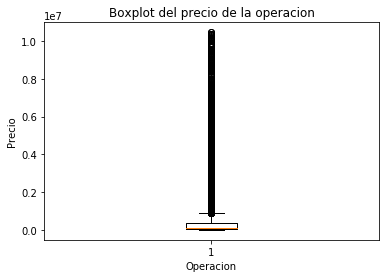

In [72]:
plt.boxplot(data_training['Total_Amount_USD'])
plt.title('Boxplot del precio de la operacion')
plt.ylabel('Precio')
plt.xlabel("Operacion")
plt.show()

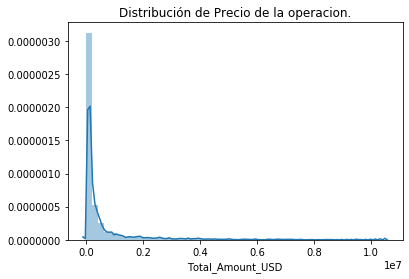

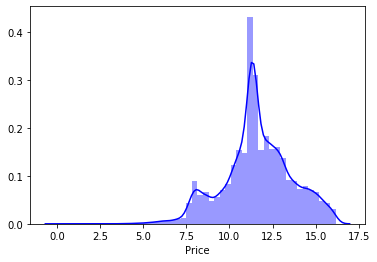

In [73]:
sns.distplot(data_training["Total_Amount_USD"])
plt.title('Distribución de Precio de la operacion.')
plt.show()

#Plot Log-Precio
sns.distplot(np.log(1+data_training["Total_Amount_USD"]),color='b')
plt.xlabel("Price")
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

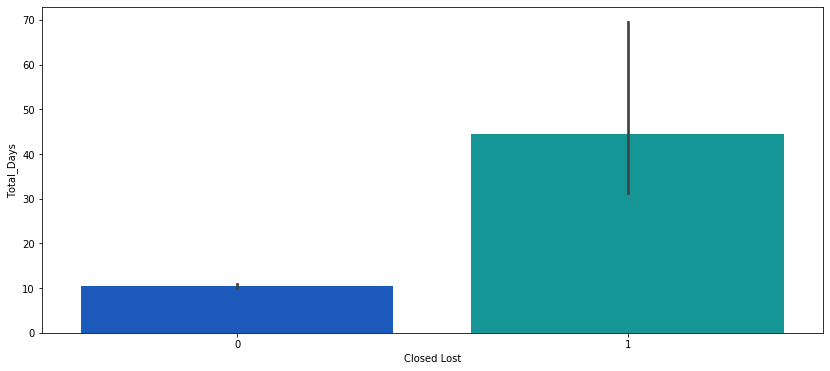

In [74]:
fig = plt.figure(figsize = (14,6))
sns.barplot(x = 'Closed Lost', y = 'Total_Days', data = data_training, palette="winter")
plt.xticks(rotation=0)